In [1]:
import pybithumb as pb
from pybithumb import Bithumb
btc = pb.get_ohlcv('BTC')
df2 = Bithumb.get_candlestick("BTC", chart_intervals="10m")

In [2]:
df = df2[['close']]
df2 = df2.rename(columns = {'close':'BTC'})
ret = df.pct_change().fillna(0)
level = (1+ret).cumprod()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
def pnl_tc(s,r):
    tc = 0.003
    return (s.shift(1)*r- tc*abs(s-s.shift(1)).fillna(0)).fillna(0)
def pnl(s,r):
    return s.shift(1)*r
def lev(s,r):
    return (pnl(s,r)+1).cumprod()
def lev_tc(s,r):
    return (pnl_tc(s,r)+1).cumprod()
def s_plot(series):
    fig,axs = plt.subplots(figsize=(5,5))
    axs.xaxis.set_major_locator(mdates.MonthLocator())  # Set major tick locator to months
    axs.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis tick labels as abbreviated month and year
    axs.plot(series,label = series.columns)
    axs.legend()
    plt.show()
def pure_tc(s):
    return abs(s-s.shift(1)).fillna(0).sum().values[0]

In [5]:
def strat_eval(series1, series2):
    # Determine the sign of each value in both series
    sign1 = np.sign(series1)
    sign2 = np.sign(series2)
    same_sign_count = (sign1 == sign2).sum()
    return (same_sign_count/len(series1)).values[0]
def sharpe(series):
    m = series.mean()
    s = series.std()
    return np.round(np.sqrt(252)*m/s,3)

In [6]:
speeds=np.linspace(0.5,0.99,10)
for spd in speeds:
    sig = ret.ewm(alpha = 1-spd).mean().shift(1)
    print('Correct: '+str(strat_eval(sig,ret)))
    print(' TC: '+str(pure_tc(sig)))

Correct: 0.4901699433522159
 TC: 1.3329807809577
Correct: 0.4865044985004998
 TC: 1.168306299150158
Correct: 0.4838387204265245
 TC: 1.0094076195984287
Correct: 0.4808397200933022
 TC: 0.8555869979427314
Correct: 0.47650783072309233
 TC: 0.7066497019496141
Correct: 0.4781739420193269
 TC: 0.562023836307066
Correct: 0.47784071976007997
 TC: 0.42167823759576306
Correct: 0.47884038653782074
 TC: 0.28523260417352264
Correct: 0.47884038653782074
 TC: 0.15309730040891972
Correct: 0.48317227590803064
 TC: 0.026442135991811715


In [7]:
speed = 0.9
#s1 = -ret.ewm(alpha = 1-speed).mean()*1000
s1 = ret.rolling(5).std()
s2 = s1.ewm(alpha = 1-speed).corr(ret)

pnl1 = pnl(s1,ret)
pnl1t = pnl_tc(s1,ret)
pnl2t = pnl_tc(s2,ret)
level_pnl1 = lev(s1,ret)
level_pnl1_tc = lev_tc(s1,ret)
level_pnl2_tc = lev_tc(s2,ret)

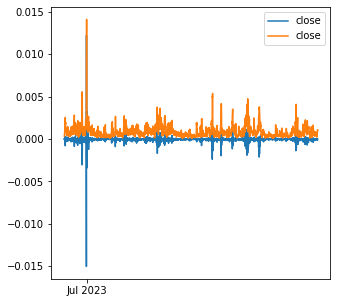

In [8]:
s_plot(pd.concat([pnl1t*100,s1],axis=1))

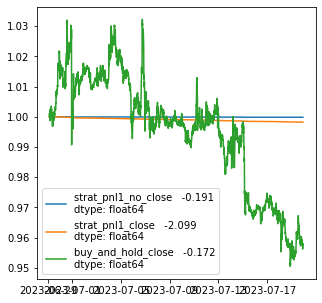

In [9]:
fig,axs = plt.subplots(figsize=(5,5))
axs.plot(level_pnl1, label = 'strat_pnl1_no_'+str(sharpe(pnl1)))
axs.plot(level_pnl1_tc, label = 'strat_pnl1_'+str(sharpe(pnl1t)))

#axs.plot(level_pnl2, label = 'strat_pnl2_'+str(sharpe(pnl2t)))
axs.plot(level,label = 'buy_and_hold_'+str(sharpe(ret)))
axs.legend()
plt.show()